In [1]:
# TUGAS BESAR BAGIAN 4
# PYTHON FOR WIRELESS COMMUNICATION MODEL
# Laurentius Nathaniel (Python G8) ( 1101194377 )

import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
fr = Frekuensi (MHz)
Tipe_Area = Tipe Area (urban, suburban, open)
hT = Tinggi Pemancar (meter)
hR = Tinggi User (meter)
d = Jarak (meter)
'''

def cost(fr,Tipe_Area,hT,hR,d):
    # Ca dan Cb di frekuensi tertentu
    if fr in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif fr in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    # nilai Cm sesuai dengan Tipe Area
    if Tipe_Area == 'Urban' :
        Cm = 0
    elif Tipe_Area == 'Suburban' :
        Cm = -2*((np.log10((fr/28)**2))-5.4)
    elif Tipe_Area == 'Open' :
        Cm = -4.78*(np.log10(fr))+18.33*(np.log10(fr))-40.94
    else :
        Cm = 'tipe salah'
    
    # nilai variabel a dengan input Tinggi Penerima (hR) dan Frekuensi (fr)
    a_hR = (1.1*np.log10(fr)-0.7)*hR-(1.56*np.log10(fr)-1.8)
    
    # nilai Pathloss (dB)
    Lp = Ca+(Cb*np.log10(fr))-(13.83*np.log(hT))-a_hR+((44.9-6.55*np.log10(hT))*np.log10(d))-Cm
    
    # fungsi cost mengembalikan nilai pathloss
    return Lp

In [3]:
# konversi numerik dan logaritmik
def mW2dBm(x):
    return 10*np.log10(x)
def dBm2mW(x):
    return 10**(x/10)

In [4]:
# menghitung daya terima (miliWatt)
def Prx(Ptx, PathLoss, Gtx, Grx):
    return dBm2mW(Ptx + Gtx + Grx - PathLoss)

In [5]:
# menghitung signal to noise ratio (SNR)
def SNR(Prx, BW):
    noise = -174 + mW2dBm(BW)
    return Prx/dBm2mW(noise)

In [6]:
# menghitung nilai kapasitas (bps)
def Kapasitas(SNR, BW):
    return BW*np.log2(1+SNR)

Parameter



In [8]:
# jarak pemancar dan penerima dimana ada 200 User pada jarak 200-700 m
d = np.random.randint(300,1000,200)
d = d[np.argsort(d)]

# variasi nilai frekuensi (MHz)
fr = [700,900,1800]

# tipe area
Tipe_Area = ["Urban","Suburban","Open"]

# tinggi pemancar (m)
hT = 80

# tinggi penerima (m)
hR = 1.5

# daya transmit (dBm)
Ptx = mW2dBm(30000)

# nilai gain receiver dan transmit (dB)
Gtx = 10
Grx = 2

# bandwith (Hz)
BW = 5000000


**Grafik A ( Variasi Lokasi )**

lokasi berbeda ( Urban, Suburban, Open ) dengan frekuensi yang sama ( 1800 MHz 
)

In [9]:
# Menghitung Nilai PathLoss (dB), Daya Terima (milliWatt), SNR, dan Kapasitas untuk Grafik A
PathLoss_A = []
Prx_A = []
SNR_A = []
Kapasitas_A = []
for i in range(3) :
    PathLoss_A.append(cost(fr[2],Tipe_Area[i],hT,hR,d))
    
    Prx_A.append(Prx(Ptx, PathLoss_A[i], Gtx, Grx))
    temp = Prx_A[i]
    Prx_A[i] = temp[np.argsort(d)]
    
    SNR_A.append(SNR(Prx_A[i], BW))
    temp = SNR_A[i]
    SNR_A[i] = temp[np.argsort(d)]

    Kapasitas_A.append(Kapasitas(SNR_A[i], BW))
    temp = Kapasitas_A[i]
    Kapasitas_A[i] = temp[np.argsort(d)]

**Grafik B ( Variasi Frekuensi )**

frekuensi berbeda ( 700, 900, 1800 MHz ) dan lokasi sama ( Urban )

In [10]:
# Menghitung Nilai PathLoss (dB), Daya Terima (milliWatt), SNR, dan Kapasitas untuk Grafik B
PathLoss_B = []
Prx_B = []
SNR_B = []
Kapasitas_B = []
for i in range(3) :
    PathLoss_B.append(cost(fr[i],Tipe_Area[0],hT,hR,d))
    
    Prx_B.append(Prx(Ptx, PathLoss_B[i], Gtx, Grx))
    temp = Prx_B[i]
    Prx_B[i] = temp[np.argsort(d)]

    SNR_B.append(SNR(Prx_B[i], BW))
    temp = SNR_B[i]
    SNR_B[i] = temp[np.argsort(d)]

    Kapasitas_B.append(Kapasitas(SNR_B[i], BW))
    temp = Kapasitas_B[i]
    Kapasitas_B[i] = temp[np.argsort(d)]

Visualisasi grafik menggunakan plot

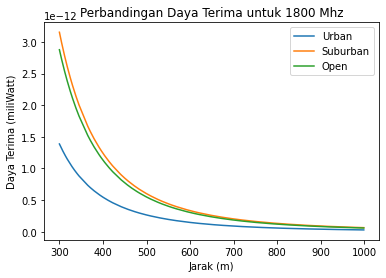

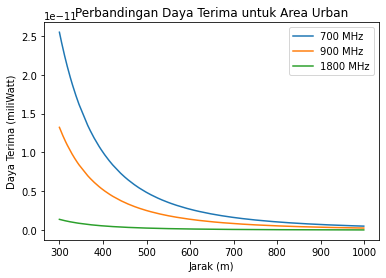

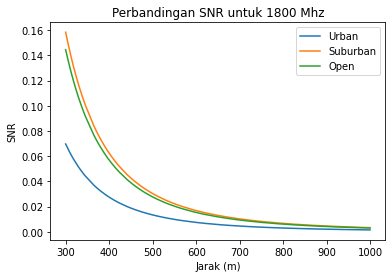

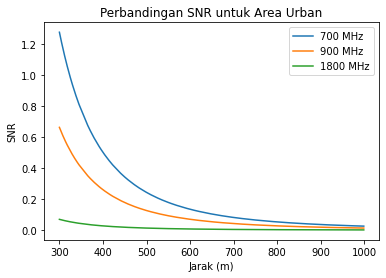

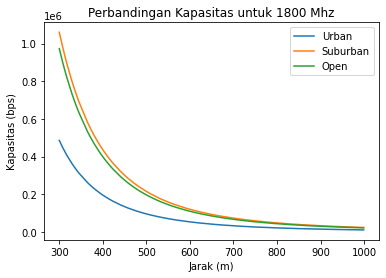

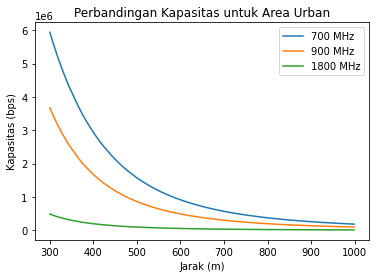

In [11]:
Sumbu_Y = [Prx_A, Prx_B, SNR_A, SNR_B, Kapasitas_A, Kapasitas_B]
Titles = [
          "Perbandingan Daya Terima untuk 1800 Mhz",
          "Perbandingan Daya Terima untuk Area Urban",
          "Perbandingan SNR untuk 1800 Mhz",
          "Perbandingan SNR untuk Area Urban",
          "Perbandingan Kapasitas untuk 1800 Mhz",
          "Perbandingan Kapasitas untuk Area Urban"
          ]
Sumbu_Y_Satuan = [
                  "Daya Terima (miliWatt)", 
                  "Daya Terima (miliWatt)", 
                  "SNR", 
                  "SNR", 
                  "Kapasitas (bps)", 
                  "Kapasitas (bps)"
                  ]

for i in range(1, len(Sumbu_Y)+1) :
    if i%2 != 0 :
        plt.figure()
        plt.plot(d, Sumbu_Y[i-1][0], label="Urban")
        plt.plot(d, Sumbu_Y[i-1][1], label="Suburban")
        plt.plot(d, Sumbu_Y[i-1][2], label="Open")
        plt.legend()
        plt.title("{}".format(Titles[i-1]))
        plt.xlabel("Jarak (m)")
        plt.ylabel("{}".format(Sumbu_Y_Satuan[i-1]))
        plt.show()
    else :
        plt.figure()
        plt.plot(d, Sumbu_Y[i-1][0], label= "700 MHz")
        plt.plot(d, Sumbu_Y[i-1][1], label= "900 MHz")
        plt.plot(d, Sumbu_Y[i-1][2], label= "1800 MHz")
        plt.legend()
        plt.title("{}".format(Titles[i-1]))
        plt.xlabel("Jarak (m)")
        plt.ylabel("{}".format(Sumbu_Y_Satuan[i-1]))
        plt.show()